In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving All files compiled and normalized.csv to All files compiled and normalized (6).csv
Saving Labels.csv to Labels (7).csv


In [ ]:
import io
data1 = pd.read_csv(io.BytesIO(uploaded['All files compiled and normalized.csv']))
# Dataset is now stored in a Pandas Dataframe

print(data1)

      Count  Total Area (per cell)  ...  IntDen (per cell)  Median
0      1.00             298.367750  ...       19020.951250     255
1     94.50            1069.503000  ...         721.490000     255
2      1.00            1192.031000  ...      303967.969000     255
3    294.00            1665.171000  ...        1444.281000     255
4      1.00             140.363000  ...        5113.224429     255
..      ...                    ...  ...                ...     ...
407   62.39             203.573581  ...          13.420694     255
408    1.00             244.733000  ...         832.093267     255
409   52.43             195.861533  ...          12.702107     255
410    1.00             179.977000  ...         580.937987     255
411   33.50             193.216202  ...          18.613570     255

[412 rows x 19 columns]


In [ ]:
import io
labels = pd.read_csv(io.BytesIO(uploaded['Labels.csv']))
# Dataset is now stored in a Pandas Dataframe

print(labels)

         Label Stain Type Combined Labels
0    Senescent       DNA    SenescentDNA 
1    Senescent       Mito   SenescentMito
2    Senescent       DNA    SenescentDNA 
3    Senescent       Mito   SenescentMito
4    Senescent       DNA    SenescentDNA 
..         ...        ...             ...
407     Normal       Mito      NormalMito
408     Normal       DNA       NormalDNA 
409     Normal       Mito      NormalMito
410     Normal       DNA       NormalDNA 
411     Normal       Mito      NormalMito

[412 rows x 3 columns]


In [ ]:
data1.head()

,Count,Total Area (per cell),Average Size,%Area,Mean,Mode,Perim. (per cell),Major,Minor,Angle,Circ.,Solidity,Feret,FeretX,FeretY,FeretAngle,MinFeret,IntDen (per cell),Median
0,1.0,298.36775,298.368,0.828,255,255,22.683500,27.805,13.352,118.712,0.469,0.854,29.930,154.671,117.647,121.588,15.162,19020.951250,255
1,94.5,1069.50300,11.317,2.967,255,255,2.071750,2.224,0.816,63.652,0.789,0.820,2.756,172.722,171.148,113.108,1.102,721.490000,255
2,1.0,1192.03100,1192.031,0.827,255,255,241.116000,63.756,23.805,139.119,0.258,0.711,68.122,253.552,227.017,123.320,29.994,303967.969000,255
3,294.0,1665.17100,5.664,1.155,255,255,2.785000,0.774,0.448,39.759,0.885,0.886,0.919,189.728,179.839,121.198,0.506,1444.281000,255
4,1.0,140.36300,140.363,0.681,255,255,5.585143,12.157,8.794,60.659,0.822,0.947,13.362,116.052,152.468,93.044,9.088,5113.224429,255


In [ ]:
data2 = data1.join(labels)

data2.head()

,Count,Total Area (per cell),Average Size,%Area,Mean,Mode,Perim. (per cell),Major,Minor,Angle,Circ.,Solidity,Feret,FeretX,FeretY,FeretAngle,MinFeret,IntDen (per cell),Median,Label,Stain Type,Combined Labels
0,1.0,298.36775,298.368,0.828,255,255,22.683500,27.805,13.352,118.712,0.469,0.854,29.930,154.671,117.647,121.588,15.162,19020.951250,255,Senescent,DNA,SenescentDNA
1,94.5,1069.50300,11.317,2.967,255,255,2.071750,2.224,0.816,63.652,0.789,0.820,2.756,172.722,171.148,113.108,1.102,721.490000,255,Senescent,Mito,SenescentMito
2,1.0,1192.03100,1192.031,0.827,255,255,241.116000,63.756,23.805,139.119,0.258,0.711,68.122,253.552,227.017,123.320,29.994,303967.969000,255,Senescent,DNA,SenescentDNA
3,294.0,1665.17100,5.664,1.155,255,255,2.785000,0.774,0.448,39.759,0.885,0.886,0.919,189.728,179.839,121.198,0.506,1444.281000,255,Senescent,Mito,SenescentMito
4,1.0,140.36300,140.363,0.681,255,255,5.585143,12.157,8.794,60.659,0.822,0.947,13.362,116.052,152.468,93.044,9.088,5113.224429,255,Senescent,DNA,SenescentDNA


In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(data1)


from sklearn.decomposition import PCA
pca_senescent = PCA(n_components=2)
principalComponents_senescent = pca_senescent.fit_transform(x)

In [ ]:
import numpy as np

np.mean(x),np.std(x)

(1.270771372079893e-17, 0.917662935482247)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_senescent = pd.DataFrame(x,columns=feat_cols)

normalised_senescent.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18
0,-0.297773,-0.199788,0.927528,-1.025554,0.0,0.0,0.722988,1.485596,1.310106,2.076868,-1.717513,-0.346613,1.500931,-0.618980,-0.659201,0.908974,1.327803,0.473306,0.0
1,0.020621,0.935518,-0.575543,-0.701864,0.0,0.0,-0.218458,-0.686395,-0.749161,-0.128486,0.372700,-1.066566,-0.680873,-0.556439,-0.428912,0.417176,-0.736244,-0.235956,0.0
2,-0.297773,1.115910,5.606972,-1.025706,0.0,0.0,10.699946,4.538066,3.027202,2.894242,-3.095748,-3.374649,4.567373,-0.276387,-0.188430,1.009422,3.505182,11.517463,0.0
3,0.699976,1.812492,-0.605144,-0.976070,0.0,0.0,-0.185880,-0.809509,-0.809612,-1.085488,0.999764,0.330989,-0.828366,-0.497518,-0.391503,0.886356,-0.823739,-0.207942,0.0
4,-0.297773,-0.432410,0.100174,-1.047800,0.0,0.0,-0.057983,0.156980,0.561371,-0.248367,0.588253,1.622668,0.170684,-0.752783,-0.509318,-0.746438,0.436123,-0.065739,0.0


In [ ]:
principal_senescent_dataframe = pd.DataFrame(data = principalComponents_senescent
             , columns = ['principal component 1', 'principal component 2'])

principal_senescent_dataframe.tail()

,principal component 1,principal component 2
407,-1.622438,0.362916
408,2.367491,-0.395433
409,-1.841277,0.343513
410,1.841723,-0.393006
411,-1.718440,0.392112


In [ ]:
senescent_pca_labelled = principal_senescent_dataframe.join(labels)

senescent_pca_labelled.tail()

,principal component 1,principal component 2,Label,Stain Type,Combined Labels
407,-1.622438,0.362916,Normal,Mito,NormalMito
408,2.367491,-0.395433,Normal,DNA,NormalDNA
409,-1.841277,0.343513,Normal,Mito,NormalMito
410,1.841723,-0.393006,Normal,DNA,NormalDNA
411,-1.718440,0.392112,Normal,Mito,NormalMito


In [ ]:
principal_senescent_dataframe.to_csv(r'C:\Users\chand\Desktop\senescent Principal Components.csv')

In [ ]:
print('Explained variation per principal component: {}'.format(pca_senescent.explained_variance_ratio_))

Explained variation per principal component: [0.47372889 0.12216285]


<Figure size 432x288 with 0 Axes>

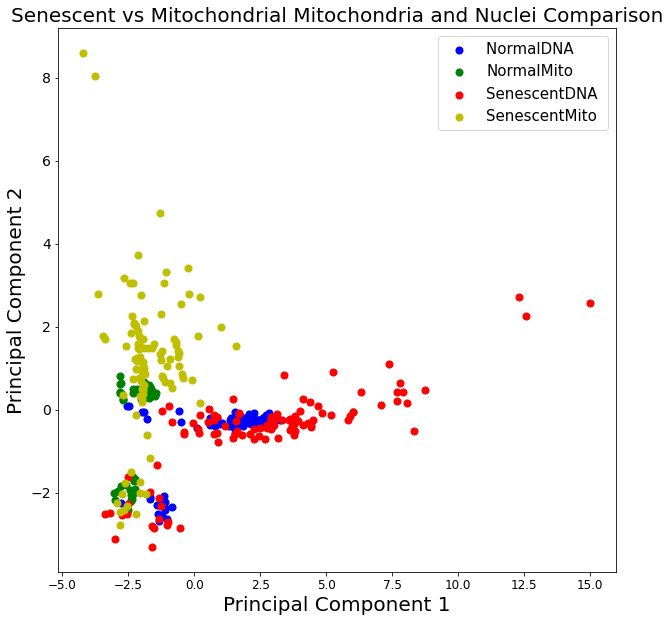

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Senescent vs Mitochondrial Mitochondria and Nuclei Comparison",fontsize=20)
targets = ['NormalDNA ', 'NormalMito', 'SenescentDNA ', "SenescentMito"]
colors = ['b', 'g', 'r', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = senescent_pca_labelled['Combined Labels'] == target
    plt.scatter(senescent_pca_labelled.loc[indicesToKeep, 'principal component 1'], senescent_pca_labelled.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


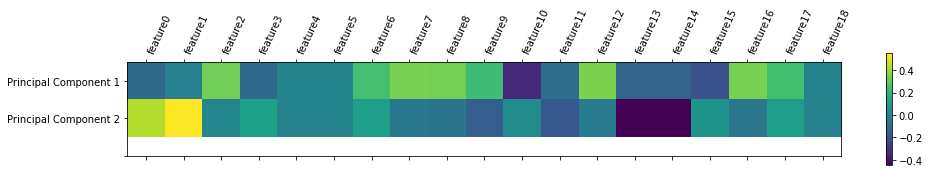

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(pca_senescent.components_, cmap = 'viridis')
plt.yticks([0, 1, 2], ['Principal Component 1', 'Principal Component 2'], fontsize = 10)
plt.colorbar()
plt.xticks(range(len(feat_cols)), feat_cols, rotation = 65, ha='left')
plt.tight_layout()
plt.show()